In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

local_base_path = #set path

import sys
sys.path.insert(0, local_base_path)

from helpers import *
from Temporal_Community_Detection import temporal_network

/Users/bengieru/Library/Mobile Documents/com~apple~CloudDocs/professional/code/MLN/Results/general_diagnostics_01/Temporal_Community_Detection.py:29: UserWarning: Graph-tool requires its own environment. Restart the kernel with a gt environment to run DSBM, otherwise you can proceed.
  warnings.warn(message = 'Graph-tool requires its own environment. Restart the kernel with a gt environment to run DSBM, otherwise you can proceed.')


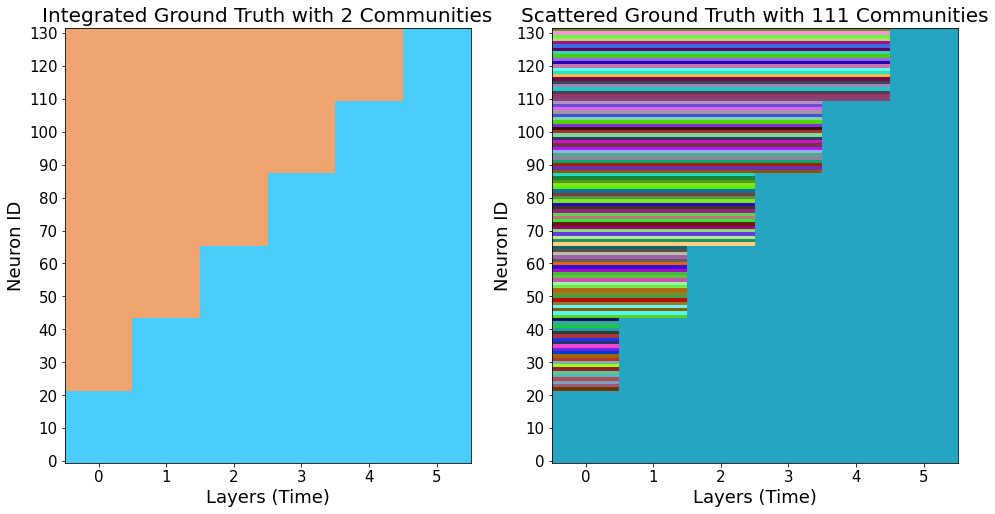

In [2]:
fixed_size = int(abs(np.random.normal(30,10)))
spike_rate = int(abs(np.random.normal(20,8)))# spike rate per commiunity
layers = 6
num_neurons = layers*fixed_size

comm_sizes = [fixed_size for i in range(layers)] 

spike_rates = [int(abs(np.random.normal(20,8))) for i in range(layers)]

window_size = 1000 # size, in frames, each adjacency matrix correspond to. better to be equal to bin_size 
standard_dev = 1.2 # for gaussian kernel
k = 5 #for jittering the spikes
pad = True

display_truth(comm_sizes, community_operation = 'grow')
#plt.savefig(local_path + 'Ground_truths.jpg')

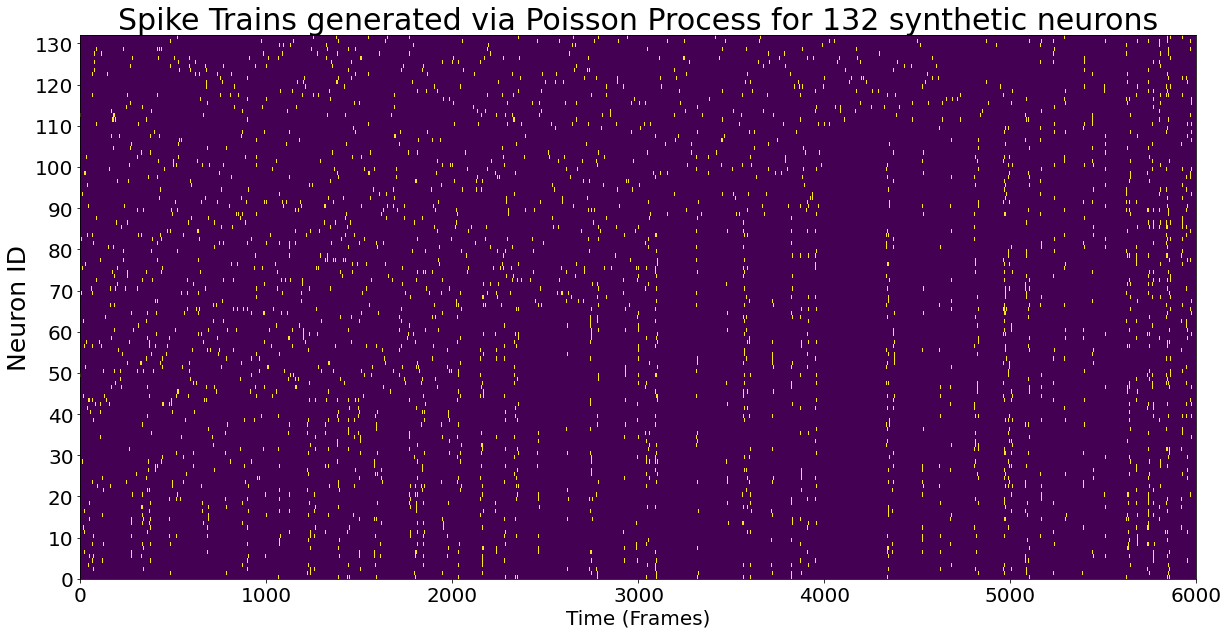

In [3]:
spikes = create_time_series('grow', comm_sizes, spike_rates, windowsize = window_size, k = k)
#plt.savefig(local_path + 'spiketrain.jpg')

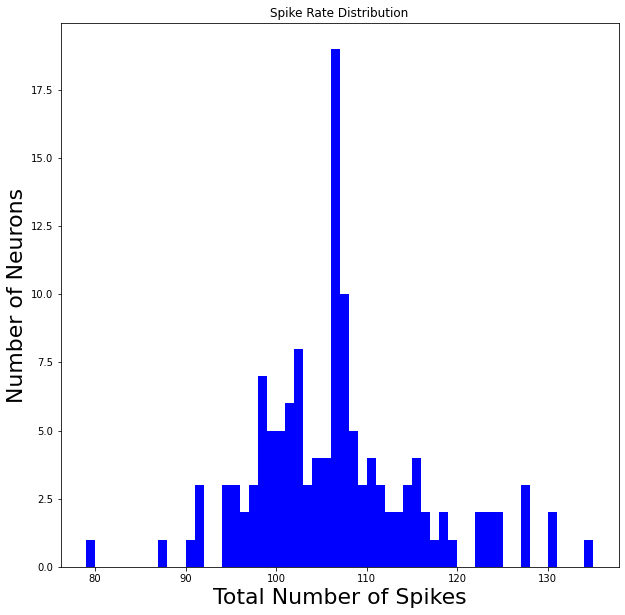

In [5]:
fig,ax = plt.subplots(1, 1, figsize = (10,10))
n, bins = spike_count(spikes, ax)
#plt.savefig(local_path + 'spike_distribution.pdf')

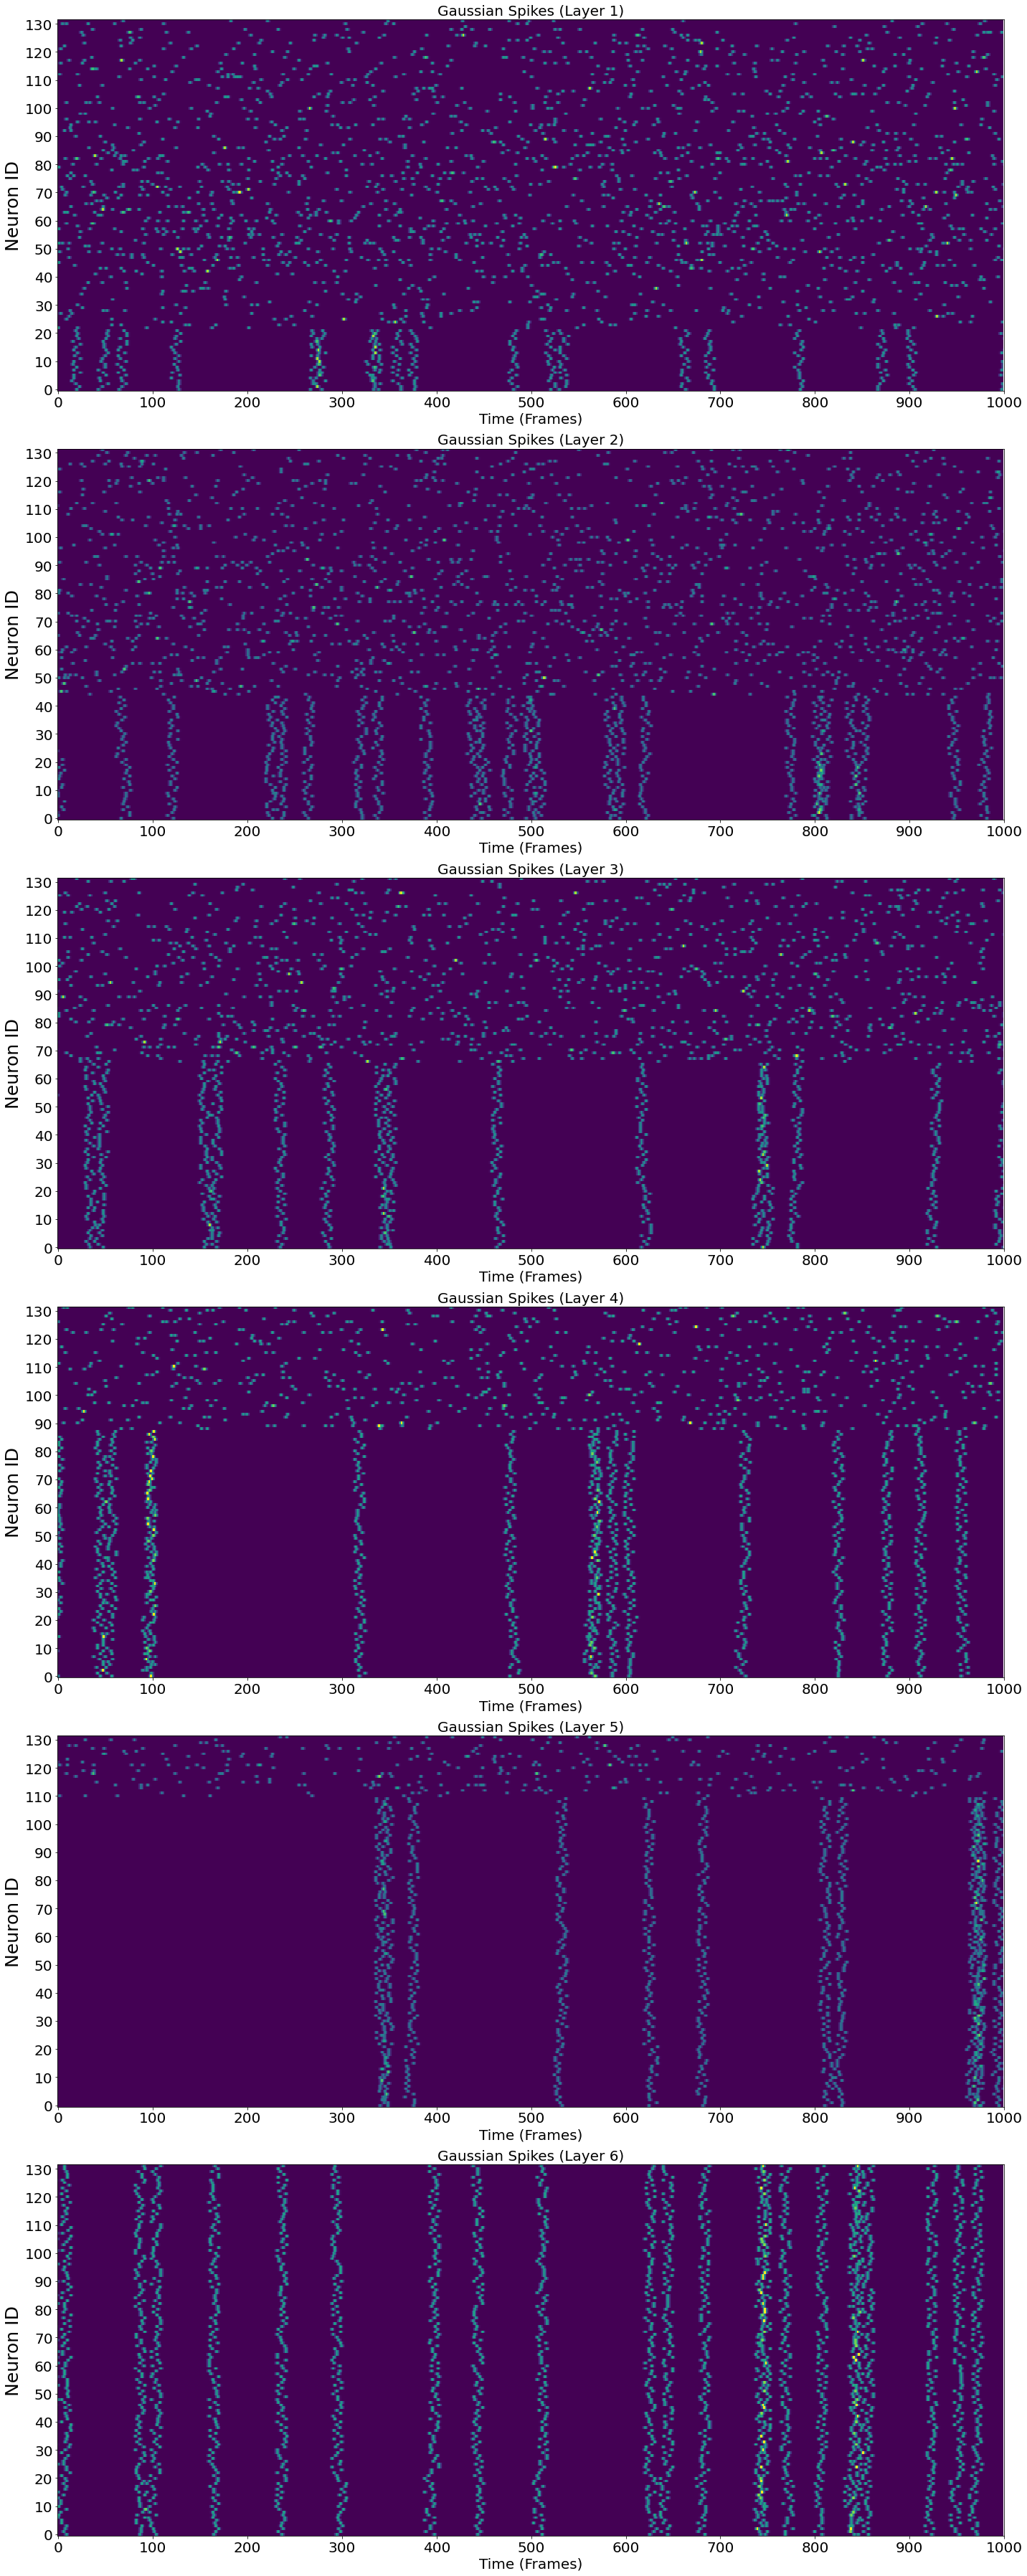

In [6]:
binned_spikes = bin_time_series(spikes, window_size, gaussian = True, sigma = standard_dev)
fig,ax = plt.subplots(layers, 1, figsize=(20,50))
for i in range(layers):
    ax[i].imshow(binned_spikes[i], origin = 'lower', interpolation='nearest', aspect='auto')
    ax[i].set_title('Gaussian Spikes (Layer %d)'%(i+1), fontsize = 20)
    ax[i].set_xlabel('TIME (in Miliseconds)', fontsize = 20)
    ax[i].set_xticks([j*100 for j in range(11)])
    ax[i].set_yticks([j*10 for j in range(int(num_neurons/10)+1)])
    ax[i].set_ylabel('Neuron ID', fontsize = 25)
    ax[i].set_xlabel('Time (Frames)', fontsize = 20)
    ax[i].tick_params(axis = 'both', labelsize = 20)
plt.tight_layout()
plt.savefig(local_path + 'binned_spiketrain_G_ESCR.pdf')

In [18]:
adjacency_matrices = {}
for i in range(layers):
    adjacency_matrices['t%d'%i] = cross_correlation_matrix(binned_spikes[i])[0]

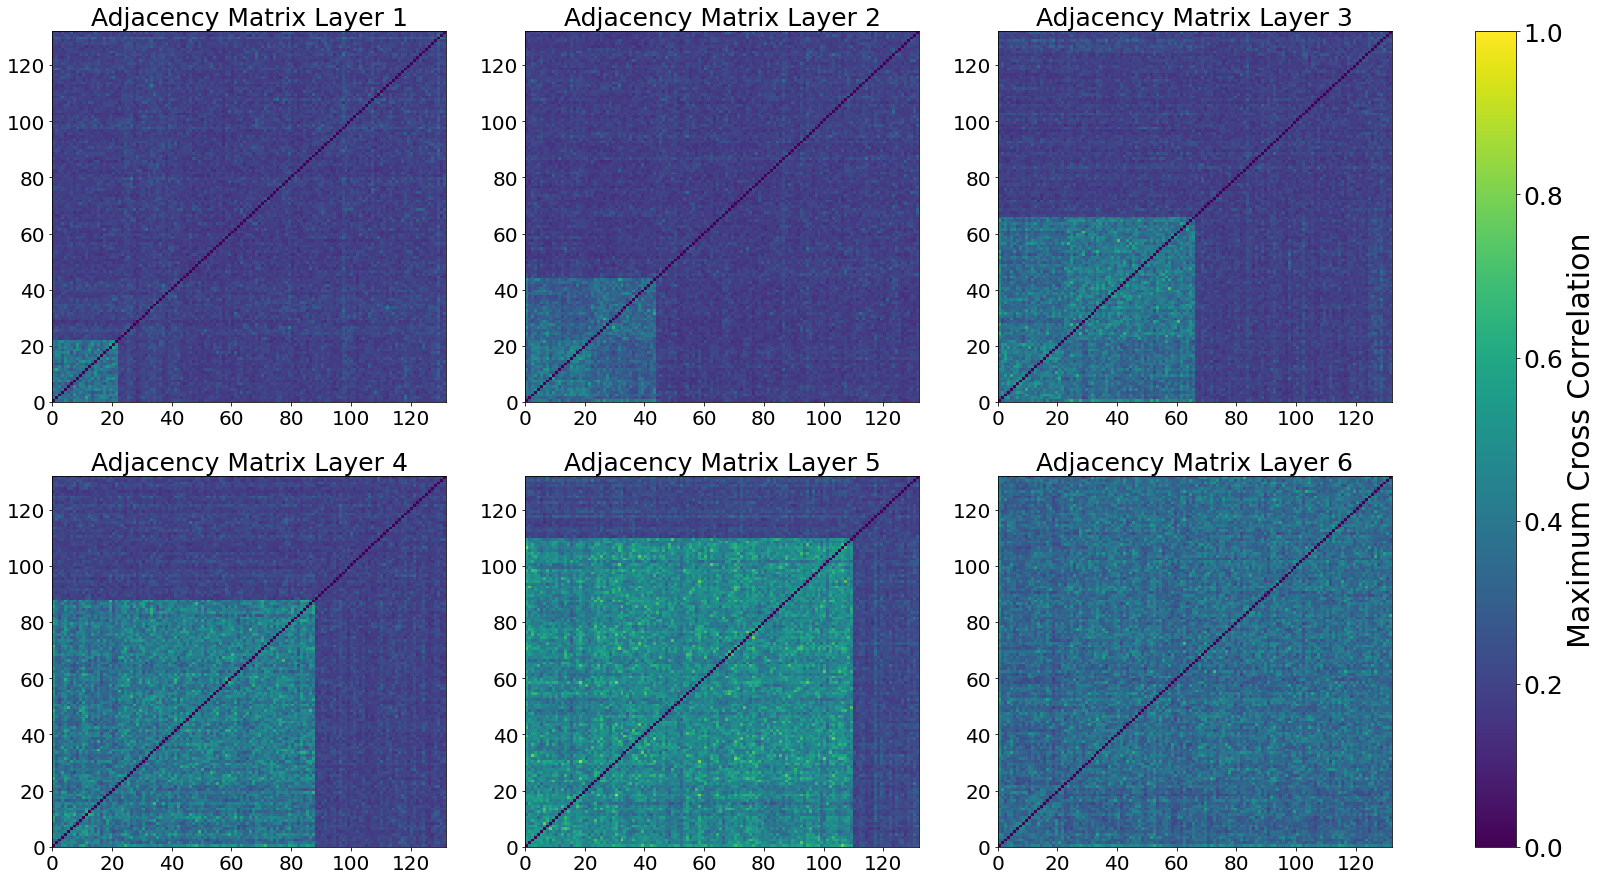

In [36]:
fig, ax = plt.subplots(2,3,figsize=(30,15))
for i in range(2):
    for j in range(3):
        k = ax[i][j].imshow(adjacency_matrices['t%d'%(i*3+j)], 
                            origin = 'lower', 
                            interpolation = 'nearest',
                            aspect = 'auto',
                            extent = [0,num_neurons,0,num_neurons], vmin = 0, vmax =1)
        ax[i][j].set_title("Adjacency Matrix Layer %d"%(i*3+j+1), fontsize = 25)
        ax[i][j].set_xticks([k*20 for k in range(int(num_neurons/20)+1)])
        ax[i][j].set_yticks([k*20 for k in range(int(num_neurons/20)+1)])
        ax[i][j].tick_params(axis = 'both', labelsize = 20)
#fig.suptitle('Community Expansion with sizes %d,%d,%d,%d,%d,%d'%(comm_sizes[0], comm_sizes[1],comm_sizes[2],comm_sizes[3],comm_sizes[4],comm_sizes[5]), fontsize = 50)
cbar = fig.colorbar(k, ax = ax.flat, orientation = 'vertical')
cbar.ax.tick_params(labelsize = 25)
cbar.ax.set_ylabel('Maximum Cross Correlation', fontsize = 30, rotation = 'vertical')
plt.savefig(local_path + 'adjacencies_G_ESCR.jpg')